In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("/Users/kanishkarathnayake/Downloads/Arc Downloads/Iris Outliers.csv")
df.head(20)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,28.6,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,30.5,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


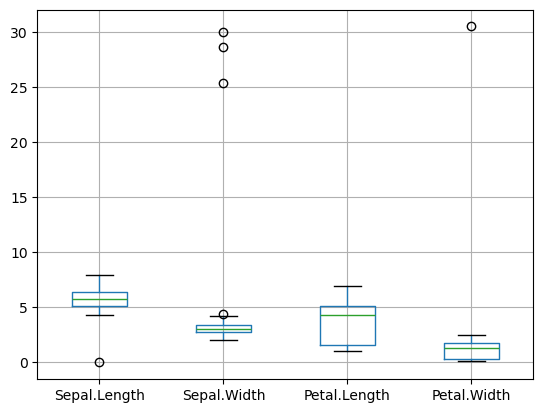

In [16]:
df.iloc[: , :4].boxplot()
plt.show()     #circles represent outliers

In [27]:
Q1 = df.quantile(0.25, numeric_only=True)   #not applicable for categorical data
Q3 = df.quantile(0.75, numeric_only=True)

In [28]:
Q1     #first quantile

Sepal.Length    5.1
Sepal.Width     2.8
Petal.Length    1.6
Petal.Width     0.3
Name: 0.25, dtype: float64

In [29]:
Q3     #third quantile

Sepal.Length    6.4
Sepal.Width     3.4
Petal.Length    5.1
Petal.Width     1.8
Name: 0.75, dtype: float64

In [30]:
IQR = Q3-Q1

In [26]:
IQR

Sepal.Length    1.3
Sepal.Width     0.6
Petal.Length    3.5
Petal.Width     1.5
dtype: float64

In [31]:
df1 = pd.DataFrame({"A": [12,34,45,33], "B": [21,32,54,65], "C": ["a", "b", "c", "d"], "D": [21,32,54,23]})

In [32]:
df1

,A,B,C,D
0,12,21,a,21
1,34,32,b,32
2,45,54,c,54
3,33,65,d,23


In [33]:
df1[["A", "B", "D"]]

,A,B,D
0,12,21,21
1,34,32,32
2,45,54,54
3,33,65,23


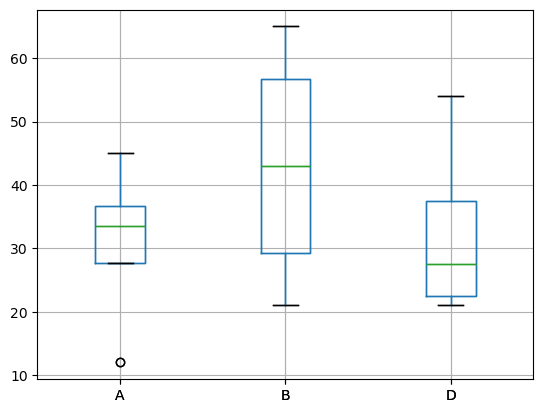

In [35]:
df1.iloc[:,:].boxplot()
plt.show()

In [38]:
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [39]:
LL

Sepal.Length    3.15
Sepal.Width     1.90
Petal.Length   -3.65
Petal.Width    -1.95
dtype: float64

In [40]:
UL

Sepal.Length     8.35
Sepal.Width      4.30
Petal.Length    10.35
Petal.Width      4.05
dtype: float64

In [44]:
dfn = df.iloc[ : , :4]
dfn.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,28.6,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
dfn < LL

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [48]:
dfr = (dfn<LL)|(dfn>UL)

In [51]:
dfr.head(20)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,True
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [56]:
((dfn<LL)|(dfn>UL)).any() #columns with atlest one outlier

Sepal.Length     True
Sepal.Width      True
Petal.Length    False
Petal.Width      True
dtype: bool

In [60]:
out_rows = ((dfn<LL)|(dfn>UL)).any(axis = 1)  #rows with atlest one outlier

In [61]:
out_rows

0      False
1       True
2      False
3      False
4      False
       ...  
145    False
146     True
147    False
148    False
149    False
Length: 150, dtype: bool

In [62]:
~out_rows  #rows without outliers

0       True
1      False
2       True
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149     True
Length: 150, dtype: bool

In [63]:
df_outfree = df[~out_rows]

In [64]:
df_outfree

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


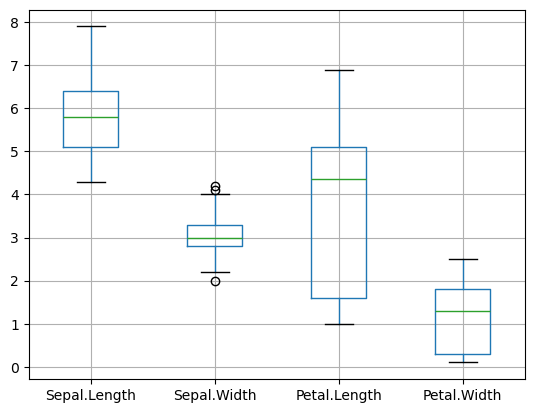

In [65]:
df_outfree.iloc[: , :4].boxplot()
plt.show()